## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

За кожне вірно виконане завдання Ви отримуєте **1 бал**.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 
  
  
  

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv("titanic.csv")

**Задача 1:** Який відсоток виживання серед чоловіків / жінок? 

In [27]:
survived_by_gender = dataset.groupby('Sex')['Survived'].mean() * 100

print(survived_by_gender)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


**Задача 2:** Відтворіть ці графіки  
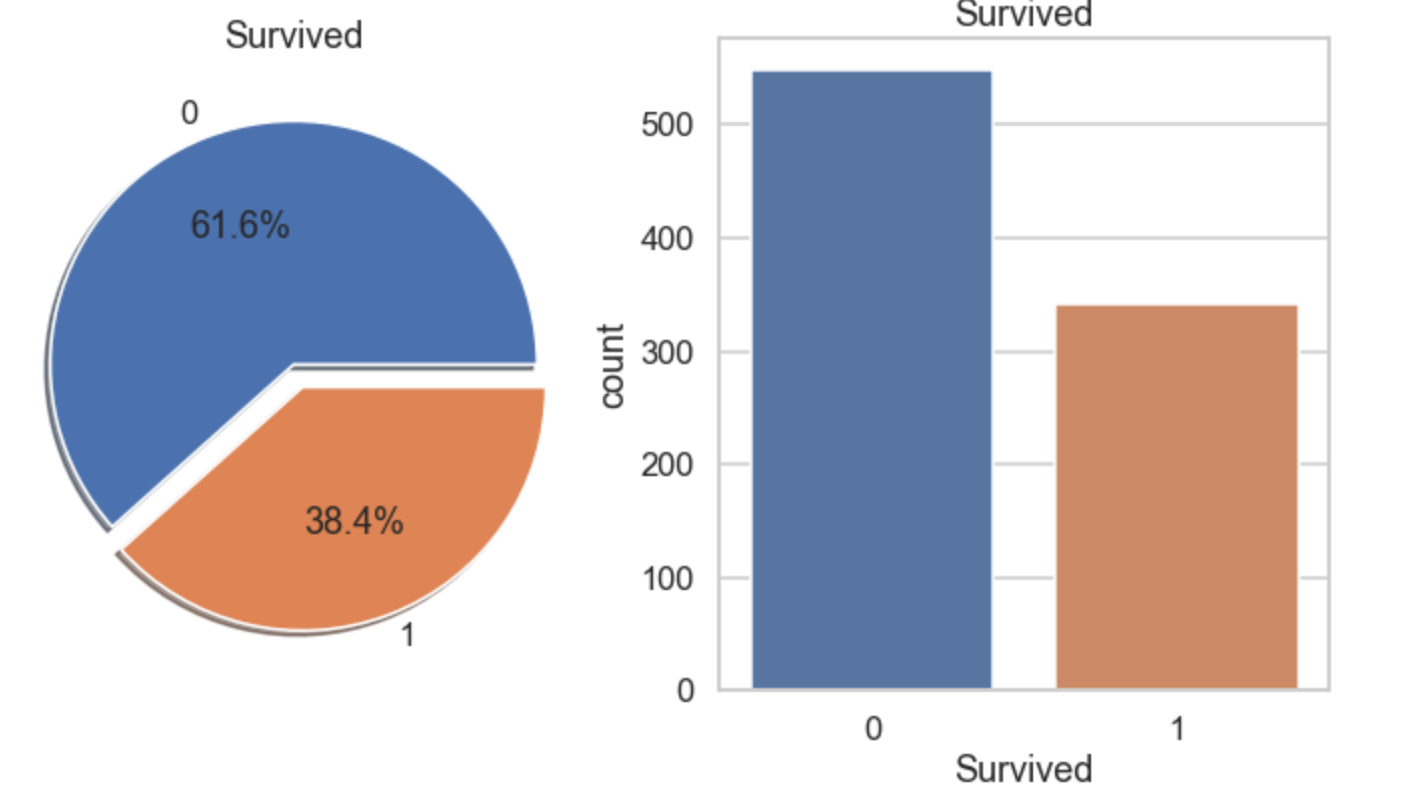


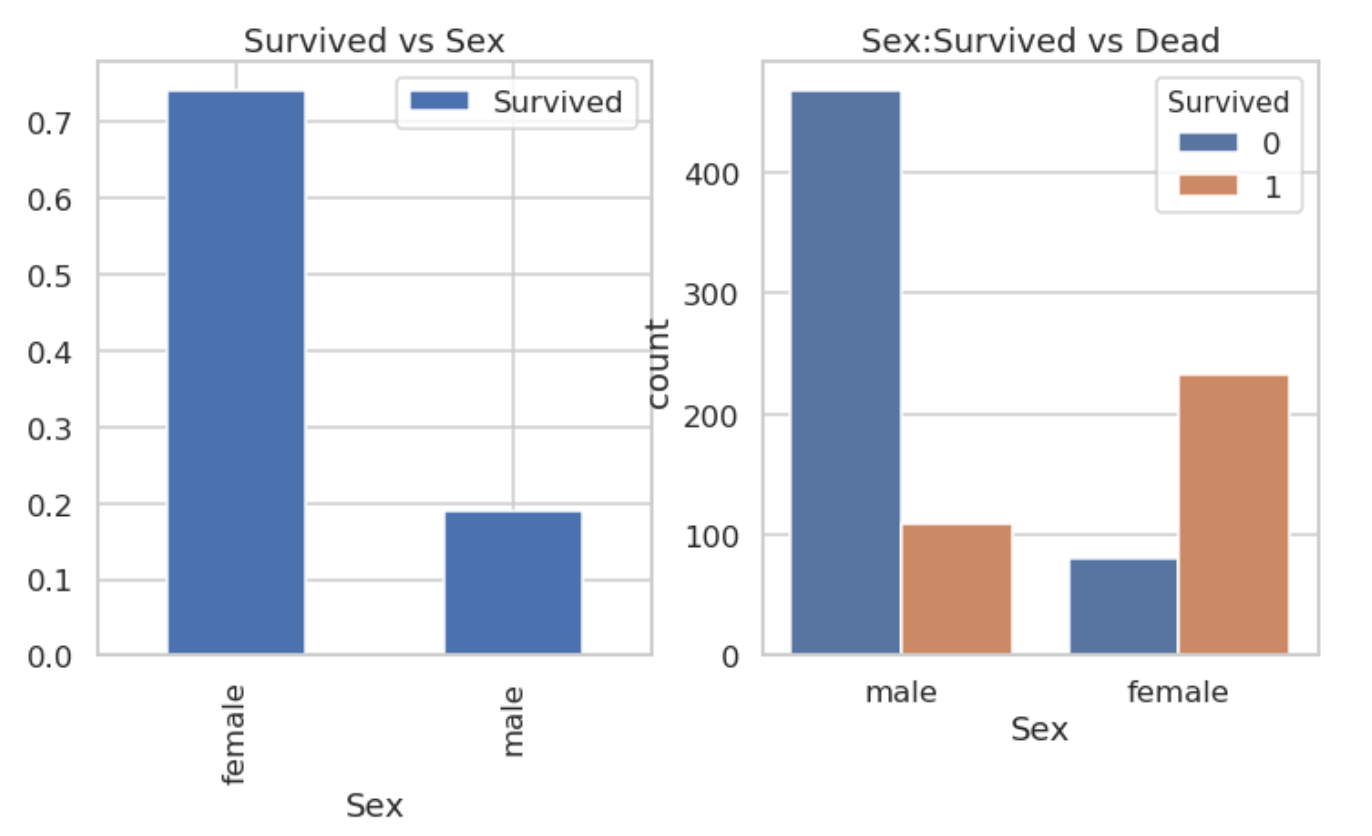

/var/folders/pk/_9jfkx9s3_93slg6pbvr54qr0000gn/T/ipykernel_53502/397619481.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=dataset, palette=('#50C4ED', '#FF7ED4'), width=0.6)


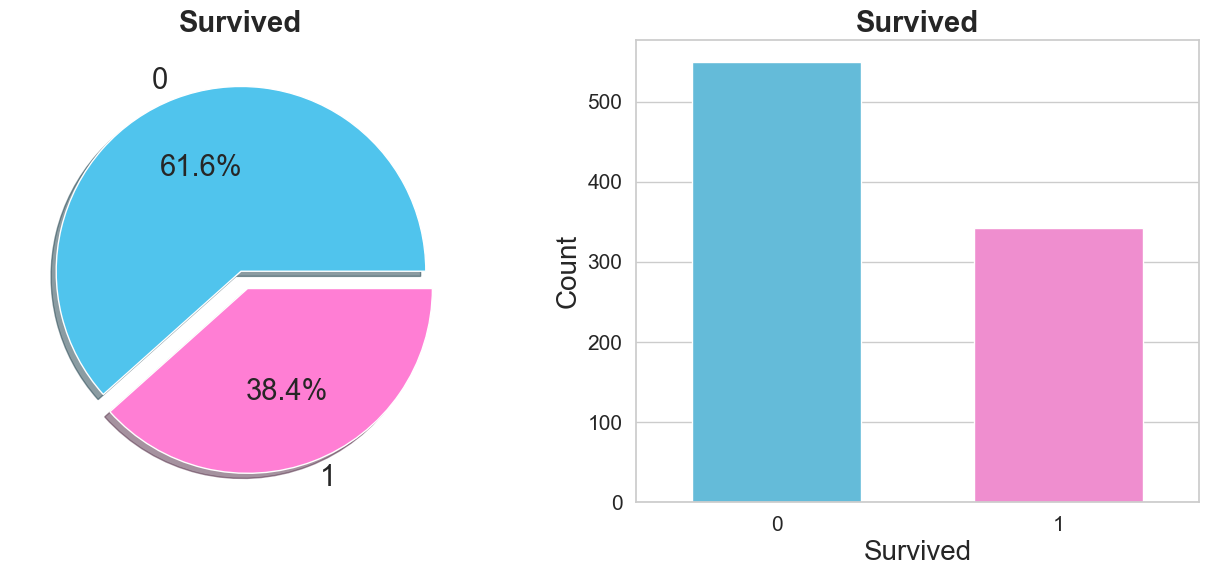

/var/folders/pk/_9jfkx9s3_93slg6pbvr54qr0000gn/T/ipykernel_53502/397619481.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_sex.index, y=survived_sex.values, palette=('#FF7ED4', '#50C4ED'), width=0.4)


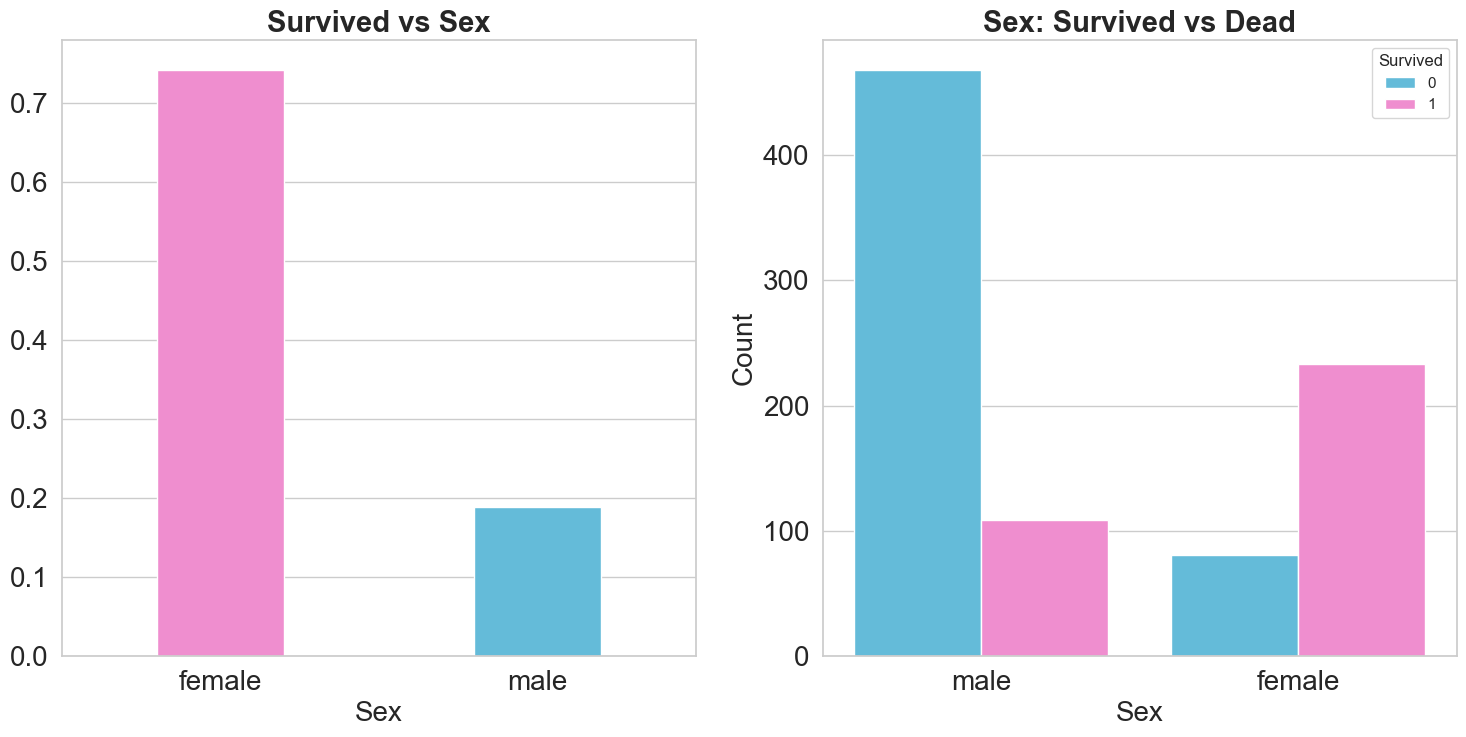

In [201]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sizes = dataset['Survived'].value_counts()
explode = (0, 0.1)  
labels = ['0', '1']
plt.pie(sizes, explode=explode, labels=labels, colors=('#50C4ED', '#FF7ED4'), autopct='%1.1f%%', shadow=True, textprops={'fontsize': 21})
plt.title('Survived', fontsize=21, fontweight='bold')

plt.subplot(1, 2, 2)
sns.countplot(x='Survived', data=dataset, palette=('#50C4ED', '#FF7ED4'), width=0.6)
plt.title('Survived', fontsize=21, fontweight='bold')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Survived', fontsize=20) 
plt.ylabel('Count', fontsize=20)

plt.show()



survived_sex = dataset.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.barplot(x=survived_sex.index, y=survived_sex.values, palette=('#FF7ED4', '#50C4ED'), width=0.4)
plt.title('Survived vs Sex', fontsize=21, fontweight='bold')

plt.xlabel('Sex', fontsize=20) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=dataset, palette=('#50C4ED', '#FF7ED4'), order=['male', 'female'])
plt.title('Sex: Survived vs Dead', fontsize=21, fontweight='bold')

plt.xlabel('Sex', fontsize=20) 
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

**Прокоментуйте побудовані графіки**:


1.   На цьому графіку ми можемо побачити відсоток виживших та загиблих на кораблі. Можна помітити, що відсоток загиблих більший, ніж виживших, а саме 
61.6% та 38.4% відповідно. 

2.   На цьому графіку ми можемо побачити кількість виживших та загиблих на Титаніку. Ми бачимо, що кількість загиблих пасажирів значно перевищує кількість виживших. 

3. На цьому графіку ми можемо побачити відсоток виживших у залежності від статі. Стовпець "female" вказує відсоток жінок, які вижили, тоді як стовпець "male" відображає відсоток чоловіків. Можна підмітити, що відсоток виживших серед жінок набагато вищий, ніж серед чоловіків, це може вказувати на те що жінкам була надана перевага під час евакуації.

4. На цьому графіку ми можемо побачити розподіл виживших і загиблих за гендером. Лівий стовпець відображає кількість жінок, які загинули та вижили, а правий стовпець - відповідно для чоловіків. Можна підмітити, що чоловіків загинуло більше аніж вижило, а жінок навпаки - більше вижило, аніж загинуло.


**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних? 

In [223]:
missing_values = dataset.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі. 

In [10]:
female_data = dataset[dataset['Sex'] == 'female']
names_list = female_data['Name'].str.split(',').str[1]

first_names = names_list.str.extract('(\s+|\.)(.*)', expand=False)

female_name_counts = first_names.value_counts()
most_common_female_name = female_name_counts.idxmax()

print("Найпопулярніше жіноче ім'я на кораблі:", most_common_female_name)

Найпопулярніше жіноче ім'я на кораблі: (' ', 'Miss. Mary')


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі. 

In [9]:
male_data = dataset[dataset['Sex'] == 'male']
names_list = male_data['Name'].str.split(',').str[1]

first_names = names_list.str.extract('(\s+|\.)(.*)', expand=False)

male_name_counts = first_names.value_counts()
most_common_male_name = male_name_counts.idxmax()

print("Найпопулярніше чоловіче ім'я на кораблі:", most_common_male_name)



Найпопулярніше чоловіче ім'я на кораблі: (' ', 'Mr. John')


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
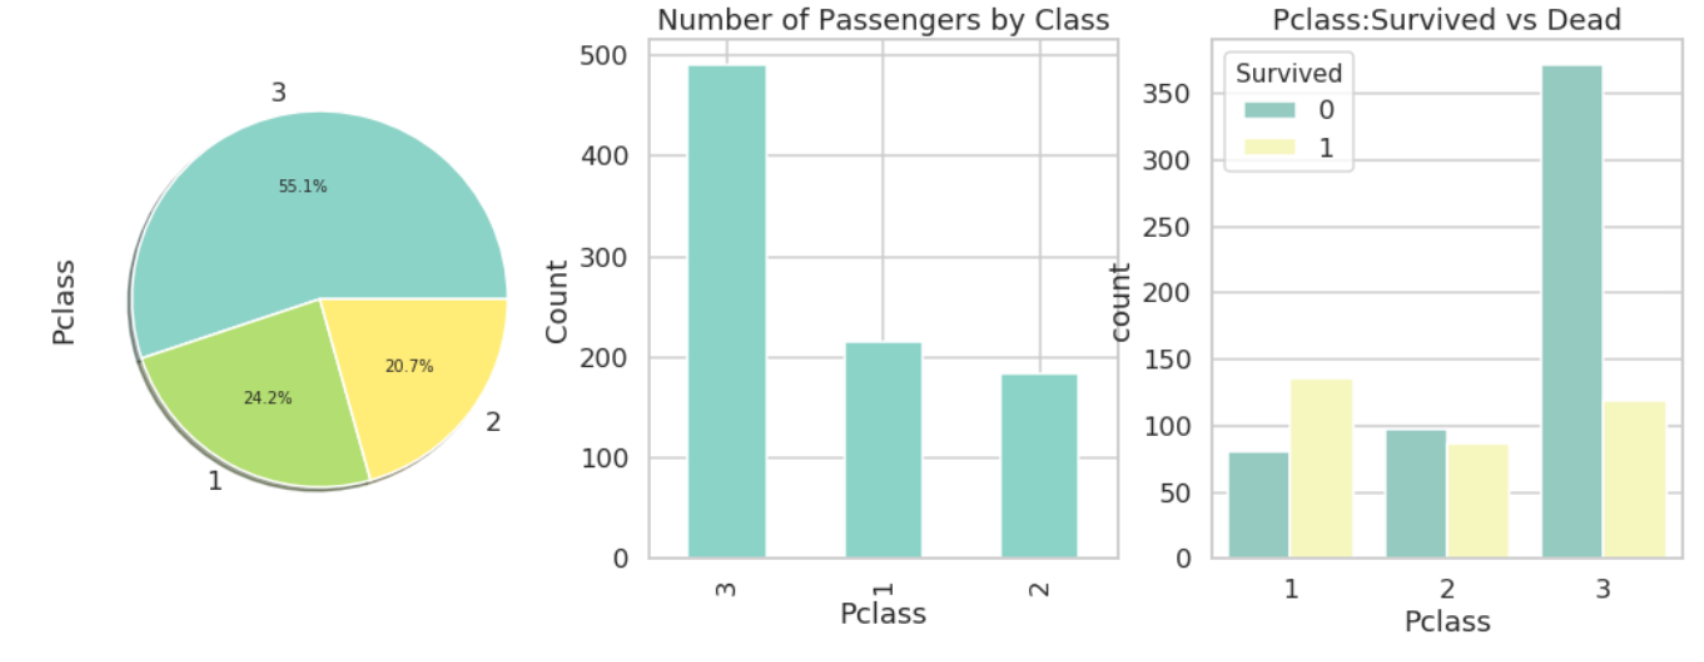

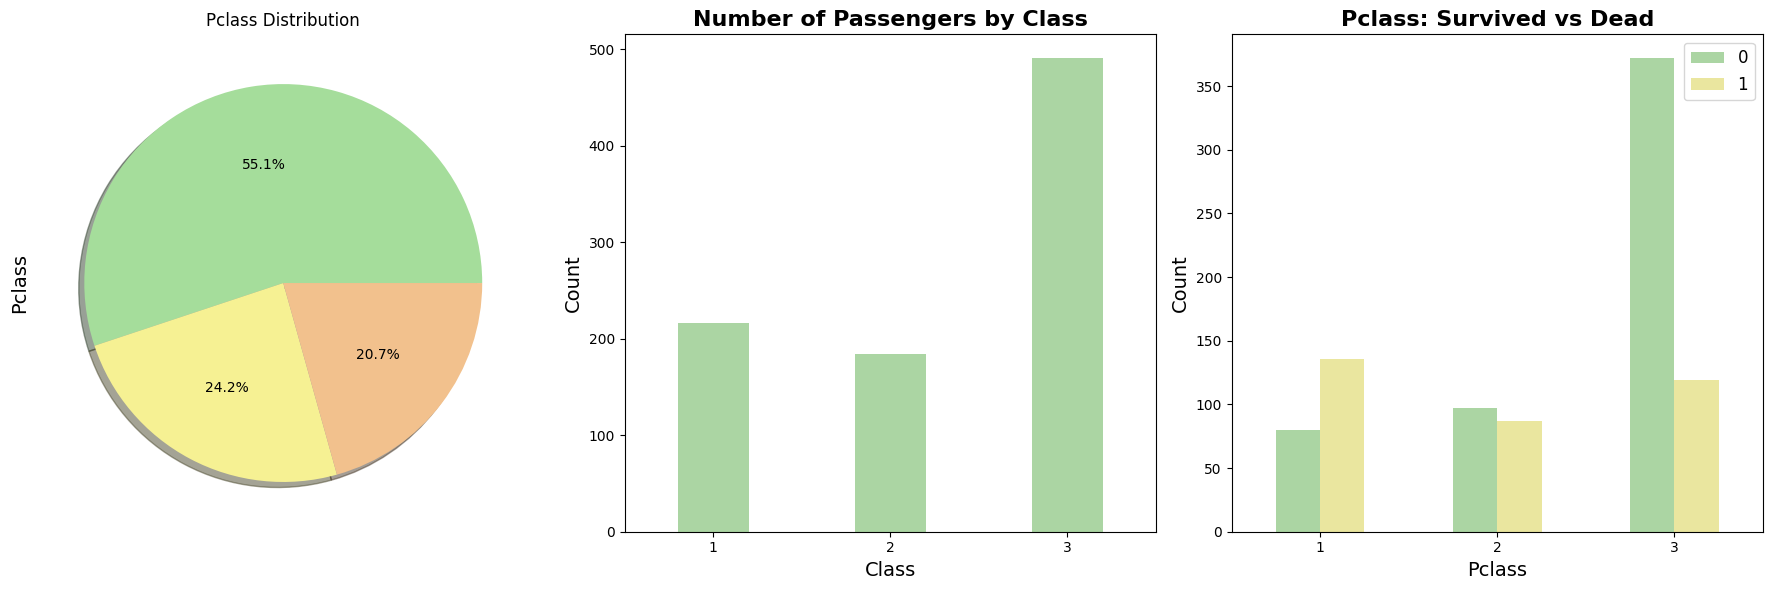

In [12]:
survived_per_class = dataset.loc[dataset['Survived'] == 0, 'Pclass'].value_counts().sort_index()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.pie(dataset['Pclass'].value_counts(), autopct='%1.1f%%', shadow=True, colors=('#A5DD9B', '#F6F193', '#F2C18D'))
plt.ylabel('Pclass', fontsize=14)
plt.title('Pclass Distribution') 

plt.subplot(1, 3, 2)
sns.countplot(x='Pclass', data=dataset, color='#A5DD9B', width=0.4)
plt.title('Number of Passengers by Class', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', hue='Survived', data=dataset, palette=('#A5DD9B', '#F6F193'), width=0.5)
plt.title('Pclass: Survived vs Dead', fontsize=16, fontweight='bold')
plt.xlabel('Pclass', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['0', '1'], fontsize=12)

plt.tight_layout()
plt.show()

**Прокоментуйте побудовані графіки**:


1.   Перший графік показує кількість пасажирів за класом. 
2.   Другий графік показує загальну кількість пасажирів у кожному класі. Більше стовпців відповідає більшій кількості пасажирів у цьому класі.
3. Третій графік демонструє кількість пасажирів, які вижили та загинули у кожному класі. Кожен клас розділений на два стовпці: один показує кількість загиблих, а інший - кількість виживших, позначену різними кольорами.

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
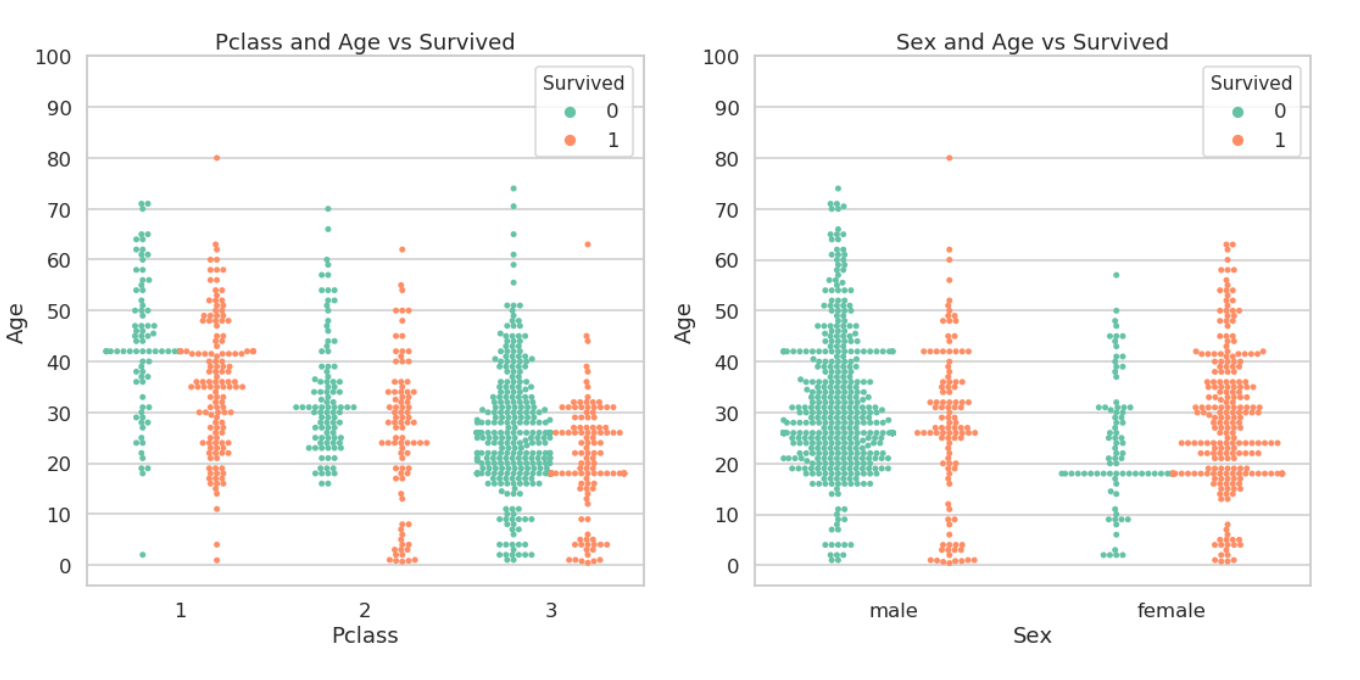

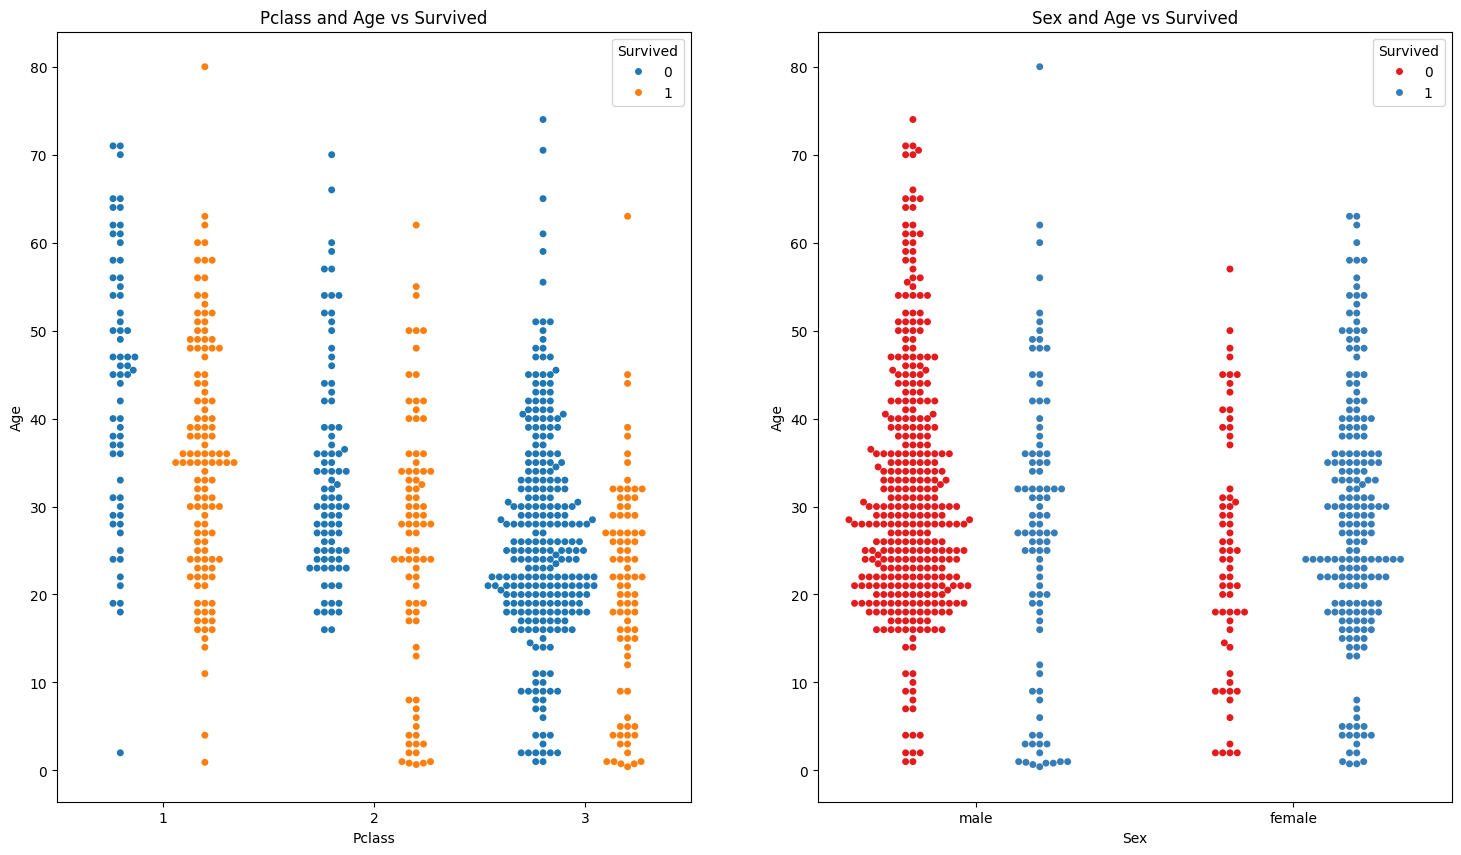

In [13]:
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
sns.swarmplot(x='Pclass', y='Age', data=dataset, hue='Survived', dodge=True)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Pclass and Age vs Survived')

plt.subplot(1, 2, 2)
sns.swarmplot(x='Sex', y='Age', data=dataset, hue='Survived', palette='Set1', dodge=True)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Sex and Age vs Survived')
plt.legend(title='Survived', loc='upper right')

plt.show()

**Прокоментуйте побудовані графіки**:


1.   На першрму графіку ми можемо побачити віковий розподіл пасажирів у залежності від їх класу і виживання. Кожна точка демонструє окремого пасажира. Горизонтальне розташування точок відповідає класу пасажира, тоді як вертикальне розташування показує їх вік. Кожен колір відображає статус виживання: сині відповідають тим, хто вижив, а помаранчеві - тим, хто загинув. 
2.   На другому графіку ми можемо побачити віковий розподіл пасажирів за гендером і статусом виживання. Точки демонструють окремих пасажирів, де горизонтальне розташування відповідає статі, а вертикальне - віку. Кожен колір позначає статус виживання: сині відповідають тим, хто вижив, а червоні - тим, хто загинув. 

**Задача 8** Побудуйте наступні діаграми розподілів:  

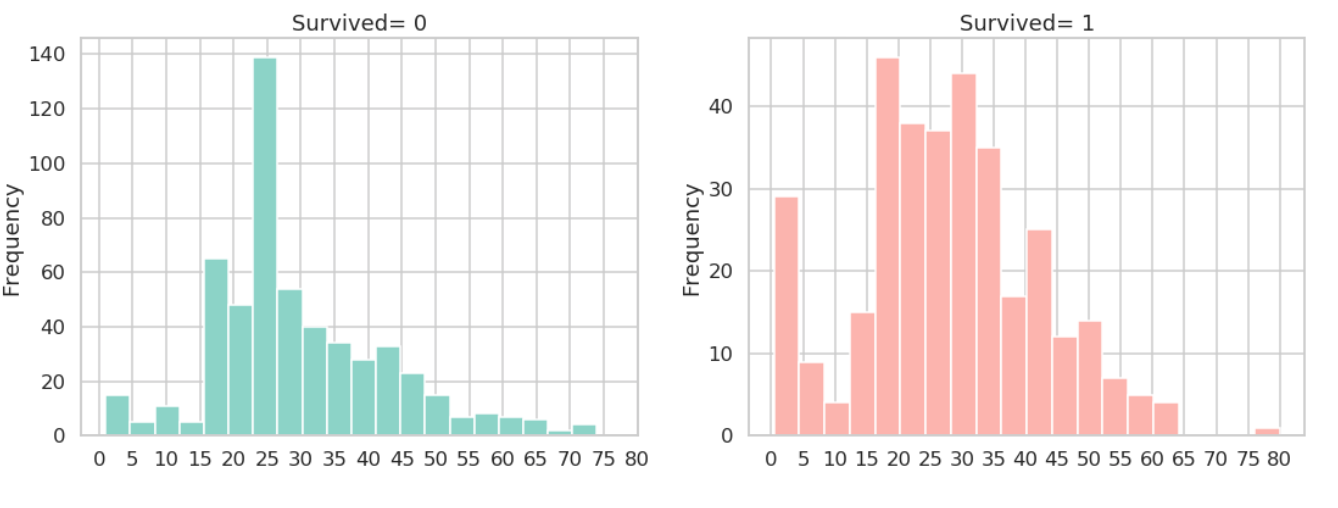



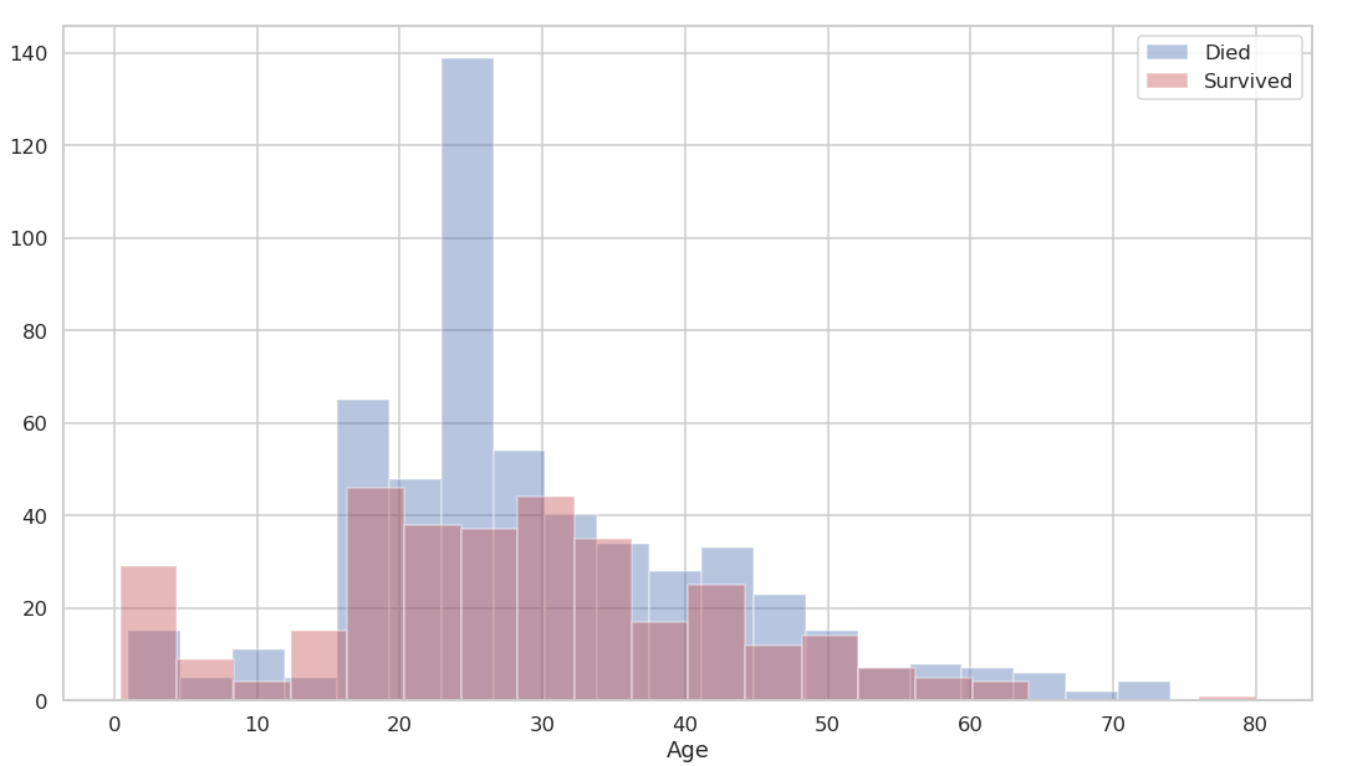

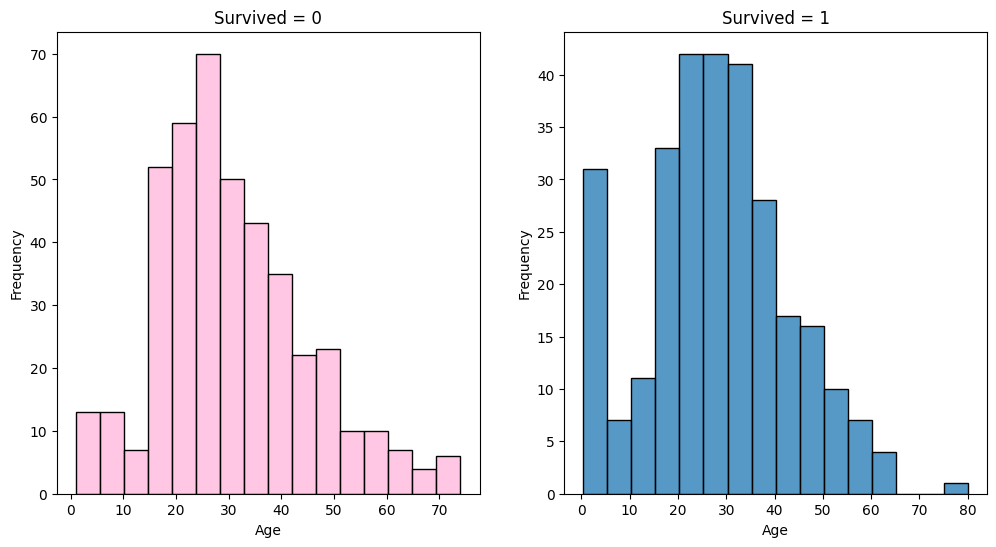

<Axes: xlabel='Age', ylabel='Count'>

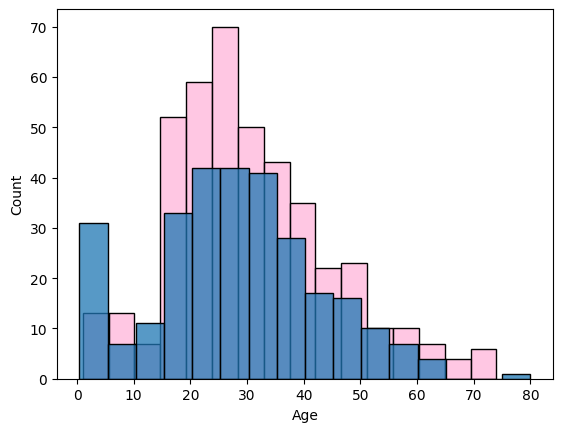

In [47]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=dataset[dataset['Survived'] == 0], x='Age', stat='count', color='#FFB5DA')
plt.title('Survived = 0')

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=dataset[dataset['Survived'] == 1], x='Age', stat='count')
plt.title('Survived = 1')

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

sns.histplot(data=dataset[dataset['Survived'] == 0], x='Age', stat='count', color='#FFB5DA')

sns.histplot(data=dataset[dataset['Survived'] == 1], x='Age', stat='count')


**Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?**



1.   Перший графік показує розподіл віку пасажирів, які не вижили. Ми бачимо, що найбільша кількість пасажирів, які померли, мають вік приблизно від 20 до 30 років.

2.   Другий графік демонструє розподіл віку пасажирів, які вижили. Тут ми також спостерігаємо найбільшу кількість виживших пасажирів у віці близько 20-30 років, але в порівнянні з першим графіком ми бачимо, що кількість виживших в цьому віковому діапазоні значно більша. Крім того, є значна кількість дітей віком до 5 років, які вижили.




**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
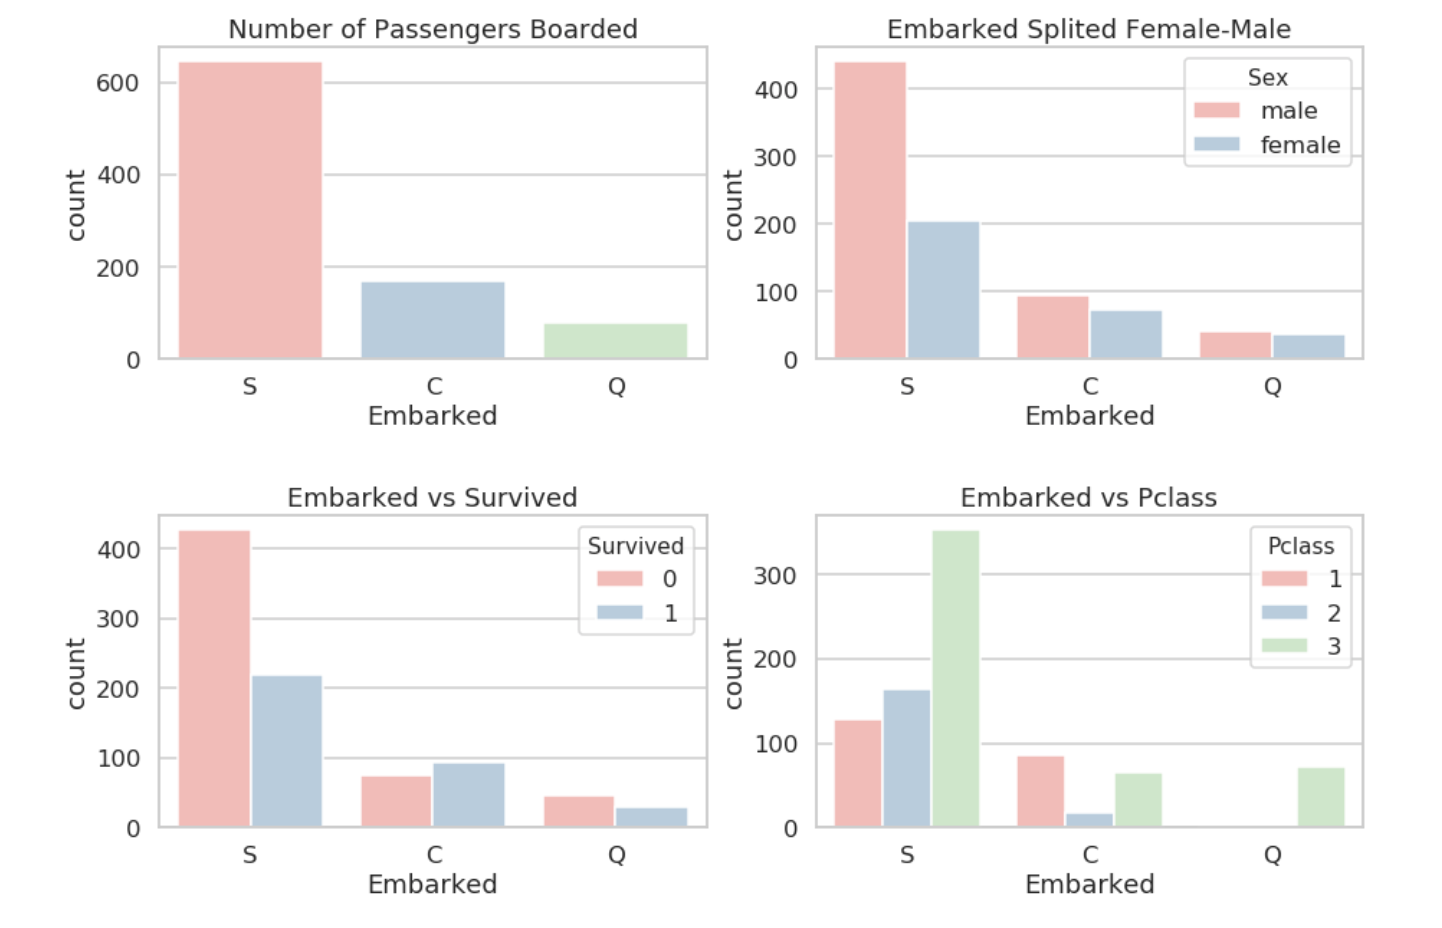

/var/folders/pk/_9jfkx9s3_93slg6pbvr54qr0000gn/T/ipykernel_53502/1281484126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=dataset, palette=['#FFB5DA', '#B7C9F2', '#C5EBAA'])


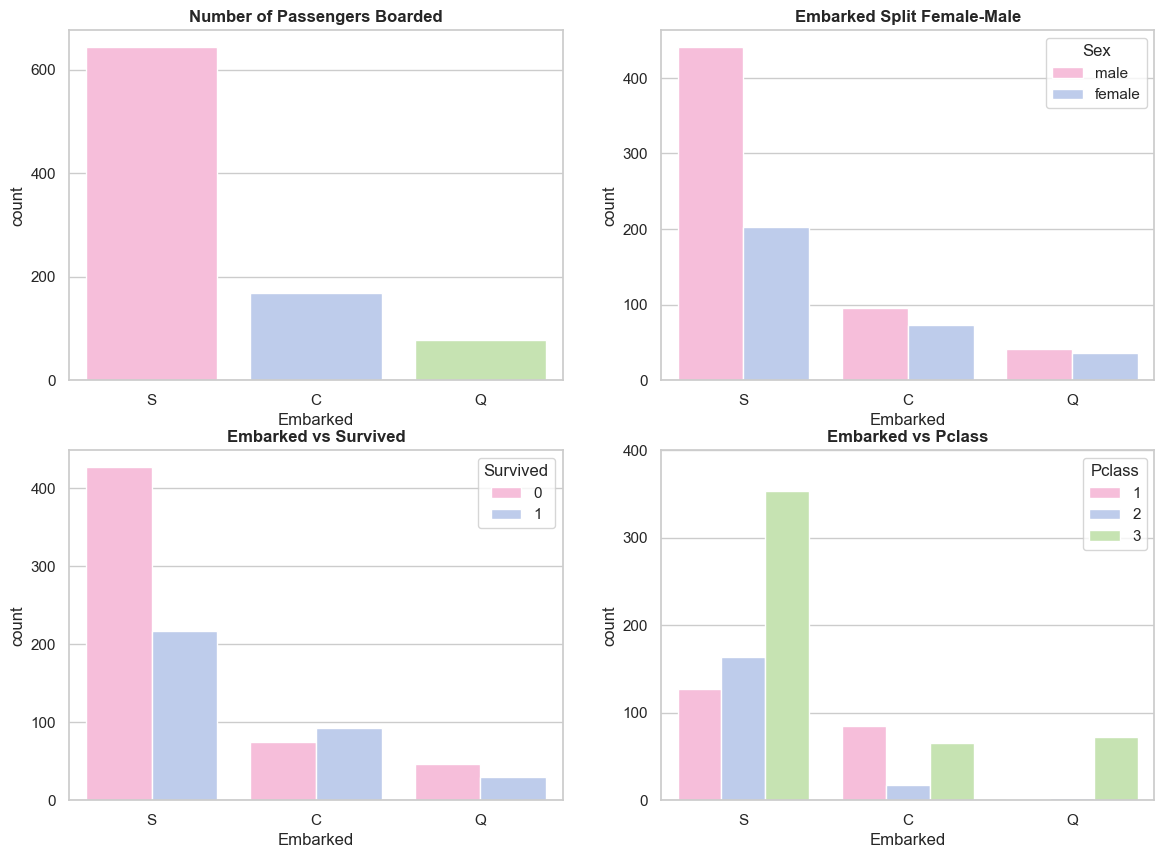

In [186]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Embarked', data=dataset, palette=['#FFB5DA', '#B7C9F2', '#C5EBAA'])
plt.title('Number of Passengers Boarded', fontweight='bold')

plt.yticks([0, 200, 400, 600])

plt.subplot(2, 2, 2)
sns.countplot(x='Embarked', hue='Sex', data=dataset, palette=['#FFB5DA', '#B7C9F2'])
plt.title('Embarked Split Female-Male', fontweight='bold')

plt.yticks([0, 100, 200, 300, 400])

plt.subplot(2, 2, 3)
sns.countplot(x='Embarked', hue='Survived', data=dataset, palette=['#FFB5DA', '#B7C9F2'])
plt.title('Embarked vs Survived', fontweight='bold')

plt.yticks([0, 100, 200, 300, 400])

plt.subplot(2, 2, 4)
sns.countplot(x='Embarked', hue='Pclass', data=dataset, palette=['#FFB5DA', '#B7C9F2', '#C5EBAA'])
plt.title('Embarked vs Pclass', fontweight='bold')

plt.yticks([0, 100, 200, 300, 400])

plt.show()

1. На першому графіку ми можемо побачити кількість пасажирів, які зайшли на борт корабля. Ми бачимо, що найбільше зайшло у порту Саунгемптом
, менше у Шербур, на найменша кількість у Квінстаун.

2.  На другому графіку ми можемо побачити, що у порту Саутгемптон на борт зайшла найбільша кількість чоловіків порівняно із жінками. У порту Шербур та Квінстаун співвідношення між чоловіками та жінками більш рівне, хоча все одно чоловіків більше.

3.  На третьому графіку багато пасажирів, які зайшли на борт у порту Саутгемптон, не вижили, в той час як у Шербур та Квінстаун вижило більше пасажирів.

4. На четвертому графіку багато пасажирів першого класу зайшли на борт у Саутгемптон, тоді як у Шербур менше. У порту Квінстаун зайшли пасажири тільки третього класу.

**Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

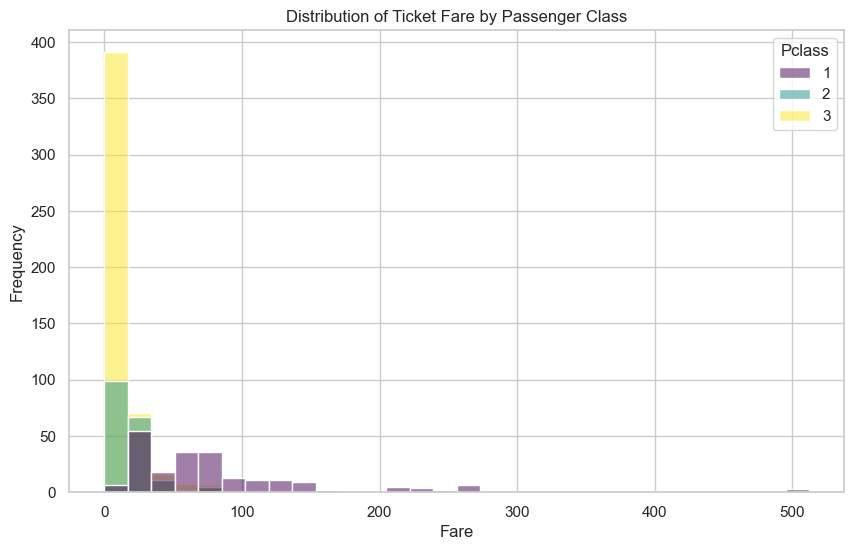

In [229]:
plt.figure(figsize=(10, 6))

sns.histplot(data=dataset, x='Fare', hue='Pclass', bins=30, palette='viridis')
plt.title('Distribution of Ticket Fare by Passenger Class')

plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.show()

**Прокоментуйте побудовані графіки**:

Цей код побудовує гістограму розподілу вартості квитків для кожного класу пасажирів. Кожен клас позначено відтінками різних кольорів на гістограмі, що дозволяє легко порівняти розподіл між класами. Гістограма відображає кількість пасажирів у кожному класі, які купили квитки в певних цінових діапазонах.
 З цієї гістограми можна побачити, як розподіляються ціни на квитки між різними класами пасажирів. Наприклад, можна помітити, що більшість пасажирів третього класу купували дешеві квитки, тоді як пасажири першого класу мали більш різноманітні ціни на квитки, включаючи як дорогі, так і дешеві.